## Chemical Applications of Machine Learning (CHEM 4930/5610) - Spring 2026

### Assignment 1 - Deadline 1/20/2026
Points 10

In this assignments, you will perform three different tasks on simple datasets.

#### General Comments
All figures and graph should have approriate labels on the two axis, and should include a legend with appropriate labels of the different plots.

When working with multiple datasets, avoid doing things by hand and instead try to use for loops.

The notebook should be return in working format. That is, I should be able to reset all the output and re-run all the cells and get the same results as you obtained.

**You should start by saving a copy of the notebook to your Google Drive so you preserve all changes.**

**Please add your name as a suffix to the filname**

**Student Name**: PRIYA LIMBU

**AI usage statement:**
I have used ChatGpt and google Gemini(mostly). Both of these AI are great in terms of their assistance but generated code depends on prompt you have given.

### Task 1 - 2 points

Create a python functions that convert Celsius to Fahrenheit and vice versa.

Create three version:
- A) One should take in a number and return the converted number as a variable that one can save into variable.
- B) One should take in a number and print out the answer in a nice format
- C) One should take in a number and return a string with the answer in a nice format.

Show examples that show how the functions work.

##A

In [122]:
# Celsius to Fahrenheit conversions
def celsius_to_fahrenheit_return(celsius):
  fahrenheit = (celsius * 9/5) + 32
  return fahrenheit

def celsius_to_fahrenheit_print(celsius):
  fahrenheit = (celsius * 9/5) + 32
  print(f"{celsius:.2f}°C is equal to {fahrenheit:.2f}°F")

def celsius_to_fahrenheit_string(celsius):
  fahrenheit = (celsius * 9/5) + 32
  return f"{celsius:.2f}°C is equal to {fahrenheit:.2f}°F"



In [123]:
# Example for Celsius to Fahrenheit
print("Celsius to Fahrenheit Examples:")

# A) Return a variable
c_temp = 27
f_result_a = celsius_to_fahrenheit_return(c_temp)
print(f"A) {c_temp}°C (returned) = {f_result_a:.2f}°F")

# B) Print out the answer
celsius_to_fahrenheit_print(c_temp)

# C) Return a string
f_result_c = celsius_to_fahrenheit_string(c_temp)
print(f"C) {f_result_c} (returned string)")

Celsius to Fahrenheit Examples:
A) 27°C (returned) = 80.60°F
27.00°C is equal to 80.60°F
C) 27.00°C is equal to 80.60°F (returned string)


##B

In [124]:
# Fahrenheit to Celsius conversions
def fahrenheit_to_celsius_return(fahrenheit):
  celsius = (fahrenheit - 32) * 5/9
  return celsius

def fahrenheit_to_celsius_print(fahrenheit):
  celsius = (fahrenheit - 32) * 5/9
  print(f"{fahrenheit:.2f}°F is equal to {celsius:.2f}°C")

def fahrenheit_to_celsius_string(fahrenheit):
  celsius = (fahrenheit - 32) * 5/9
  return f"{fahrenheit:.2f}°F is equal to {celsius:.2f}°C"

In [125]:

print("\nFahrenheit to Celsius Examples:")
# Example for Fahrenheit to Celsius
f_temp = 80

# A) Return a variable
c_result_a = fahrenheit_to_celsius_return(f_temp)
print(f"A) {f_temp}°F (returned) = {c_result_a:.2f}°C")

# B) Print out the answer
fahrenheit_to_celsius_print(f_temp)

# C) Return a string
c_result_c = fahrenheit_to_celsius_string(f_temp)
print(f"C) {c_result_c} (returned string)")


Fahrenheit to Celsius Examples:
A) 80°F (returned) = 26.67°C
80.00°F is equal to 26.67°C
C) 80.00°F is equal to 26.67°C (returned string)


### Task 2 - 4 points

In this task we consider a dataset that consisist of 10 time series that are obtained from a stochastic process given by [autoregressive model](https://en.wikipedia.org/wiki/Autoregressive_model) of order 1. Autoregressive models are stochastic process that includes memory effects.

All the 10 time series are independent runs obtained from an autoregressive model with same set of parameters, which are the mean $\mu$, the standard deviation $\sigma$, and the $\varphi_{1}$ parameter.   

The data files have the names `Dataset-##.data` where `##` is a number from 1 to 10. Number is given by two digits and padded by zeros, so that files names are `Dataset-01.data`, `Dataset-02.data`, etc.

There is a Bash script below that takes care of downloading all the files

The data files have two columns, the first column is the time and the second column is the time series.

- A) Plot all the time series, either on the same graph, or on seperate graphs. If you plot them on seperate graphs, you must ensure that the y-axis is the same for all the graph. If you plot all the time series on the same graph, you can try to plot only every $N$ data point if the graph is too crowded.
- B) For the first dataset `Dataset-01.data`, on the same graph, plot a discrete histogram and a kernel density estimation (KDE) using Seaborn. Try different values for the number of bins in the discrete histogram. Adjust the `bw_adjust` parameter of the `seaborn.kdeplot(..)` function to find a good value that fits the data and the discrete histogram.
- C) For all the 10 time series, make a KDE plot with all on the same graph. Employ the optimal `bw_adjust` value from B).
- D) Calculate the average and standard deviation for the different time series and show the results in a nice text format.

- Optional for 1 point: Create a plot where you present the average and standard deviation in a graphical format. The x-axis should be the data file number. The standard deviation should be presented as an error bar. Can you deduce what is the mean $\mu$ value of the autoregressive model?


In [126]:
# Bash script to download all the dataset. Don't worry if you don't understand it
%%bash

url="https://raw.githubusercontent.com/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/refs/heads/main/Assignment-1/Task-2"
dataset_filename="Task-2_Dataset-"
dataset_extension="data"

rm -f ${dataset_filename}*
for i in `seq 1 10`;
do
  i2=`echo ${i} | awk '{ printf("%02d\n", $1) }'`
  wget ${url}/${dataset_filename}${i2}.${dataset_extension} &> /dev/null
done

ls

sample_data
Task-2_Dataset-01.data
Task-2_Dataset-02.data
Task-2_Dataset-03.data
Task-2_Dataset-04.data
Task-2_Dataset-05.data
Task-2_Dataset-06.data
Task-2_Dataset-07.data
Task-2_Dataset-08.data
Task-2_Dataset-09.data
Task-2_Dataset-10.data


##A

In [127]:
# importing numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

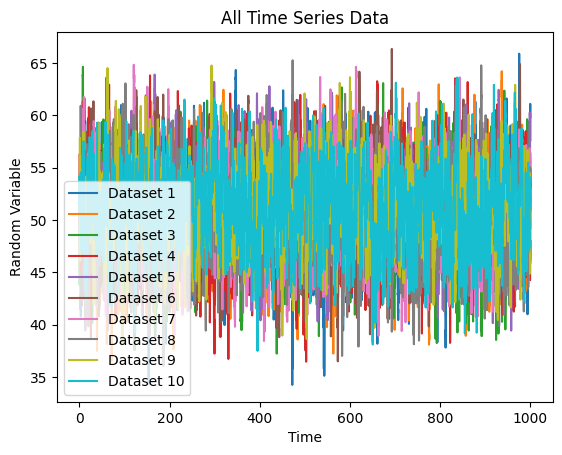

In [128]:

# Making Loops through the 10 dataset files so that we can show all 10 datas in single graph.
NumberofDataFiles = 10
for i in range(NumberofDataFiles):
  filename = f"Task-2_Dataset-{(i+1):02d}.data"
  data = np.loadtxt(filename)
  plt.plot(data[:,0], data[:,1], label=f'Dataset {i+1}')

# Adding labels and title
plt.xlabel("Time")
plt.ylabel("Random Variable")
plt.title("All Time Series Data")

# To Display the legend
plt.legend()

# Adjust y-axis limits to ensure all data is visible (optional, matplotlib often does this well by default)
# min_y = min(data[:,1].min() for i in range(NumberofDataFiles) for data in [np.loadtxt(f"Task-2_Dataset-{(i+1):02d}.data")] )
# max_y = max(data[:,1].max() for i in range(NumberofDataFiles) for data in [np.loadtxt(f"Task-2_Dataset-{(i+1):02d}.data")] )
# plt.ylim(min_y - 0.1*(max_y - min_y), max_y + 0.1*(max_y - min_y))

plt.grid(False)
plt.show()

##B

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #importing seaborn as sns for histogram and kde plot

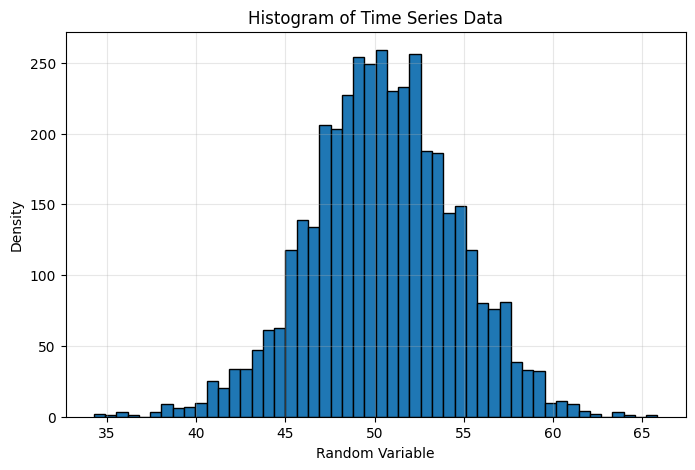

In [130]:
filename = 'Task-2_Dataset-01.data'
data = np.loadtxt(filename)
time_series_values = data[:, 1] # Extracting 2nd column

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(time_series_values, bins=50, edgecolor='black')
plt.xlabel('Random Variable')
plt.ylabel('Density')
plt.title('Histogram of Time Series Data')
plt.grid(True, alpha=0.3)

plt.show()

##C

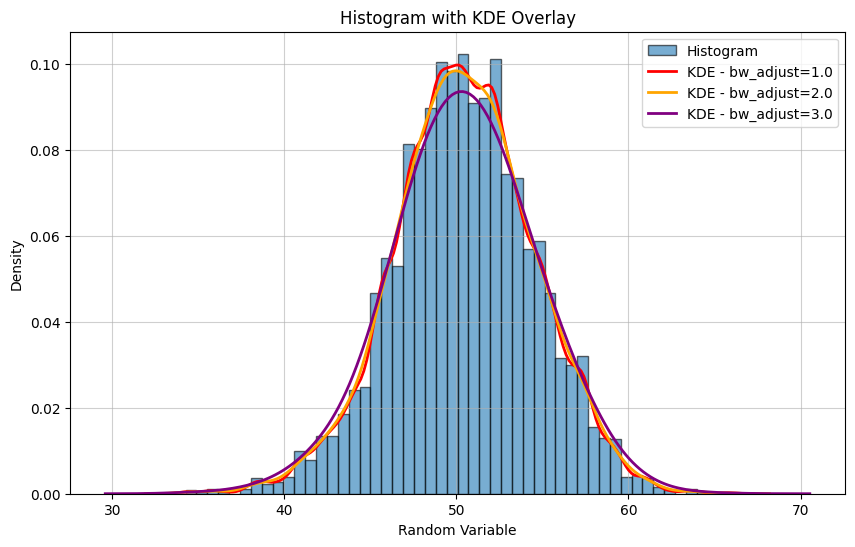

In [131]:

import seaborn as sns
filename = 'Task-2_Dataset-01.data'
data = np.loadtxt(filename)
time_series_values = data[:, 1]

plt.figure(figsize=(10, 6))

plt.hist(
    time_series_values,
    bins=50,
    density=True,
    alpha=0.6,
    edgecolor='black',
    label='Histogram'
)

# KDE plot
sns.kdeplot(
    time_series_values,
    color='red',
    linewidth=2,
    bw_adjust=0.6,
    label='KDE - bw_adjust=1.0'
)

sns.kdeplot(
    time_series_values,
    color='orange',
    linewidth=2,
    bw_adjust=1.0,
    label='KDE - bw_adjust=2.0'
)

sns.kdeplot(
    time_series_values,
    color='purple',
    linewidth=2,
    bw_adjust=2.0,
    label='KDE - bw_adjust=3.0'
)

plt.xlabel('Random Variable')
plt.ylabel('Density')
plt.title('Histogram with KDE Overlay')
plt.legend()
plt.grid(True, alpha=0.6)

plt.show()

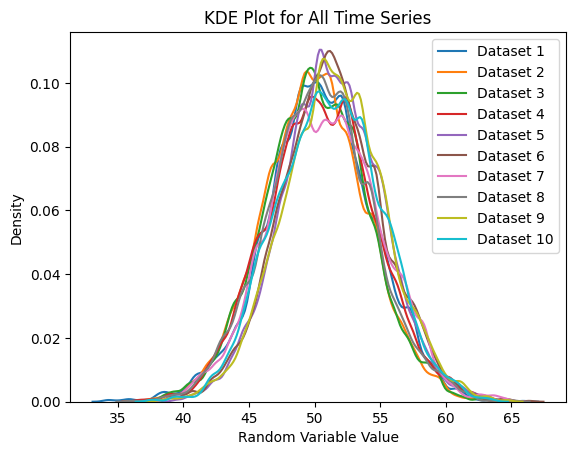

In [132]:

# Setting the optimal bw_adjust value
optimal_bw_adjust = 0.5

# preparing loop through the 10 dataset files
NumberofDataFiles = 10
for i in range(NumberofDataFiles):
  filename = f"Task-2_Dataset-{(i+1):02d}.data"
  data = np.loadtxt(filename)
  time_series_values = data[:, 1] # Extract the second column

  # Plot the Kernel Density Estimate (KDE) of these time series values
  sns.kdeplot(time_series_values, bw_adjust=optimal_bw_adjust, label=f'Dataset {i+1}')

# Add labels and title
plt.xlabel('Random Variable Value')
plt.ylabel('Density')
plt.title('KDE Plot for All Time Series')

# Display the legend
plt.legend()

# Display the plot
plt.grid(False)
plt.show()

##D

In [133]:

print("Average and Standard Deviation for Each Time Series:\n")

# Prepare lists to store results for optional plotting
dataset_numbers = []
averages = []
std_devs = []

NumberofDataFiles = 10
for i in range(NumberofDataFiles):
  filename = f"Task-2_Dataset-{(i+1):02d}.data"
  data = np.loadtxt(filename)
  time_series_values = data[:, 1] # Extracting 2nd column

  # Calculating average and standard deviation
  avg = np.mean(time_series_values)
  std = np.std(time_series_values)

  # Store for optional plotting
  dataset_numbers.append(i + 1)
  averages.append(avg)
  std_devs.append(std)

  # Print in a nice text format
  print(f"Dataset {i+1}:\n  Average = {avg:.3f}\n  Standard Deviation = {std:.3f}\n")

Average and Standard Deviation for Each Time Series:

Dataset 1:
  Average = 50.448
  Standard Deviation = 4.087

Dataset 2:
  Average = 50.050
  Standard Deviation = 3.917

Dataset 3:
  Average = 50.137
  Standard Deviation = 3.939

Dataset 4:
  Average = 50.511
  Standard Deviation = 4.121

Dataset 5:
  Average = 51.324
  Standard Deviation = 3.746

Dataset 6:
  Average = 51.241
  Standard Deviation = 3.897

Dataset 7:
  Average = 50.807
  Standard Deviation = 4.158

Dataset 8:
  Average = 50.404
  Standard Deviation = 4.002

Dataset 9:
  Average = 51.482
  Standard Deviation = 3.869

Dataset 10:
  Average = 51.120
  Standard Deviation = 3.959



## Optional

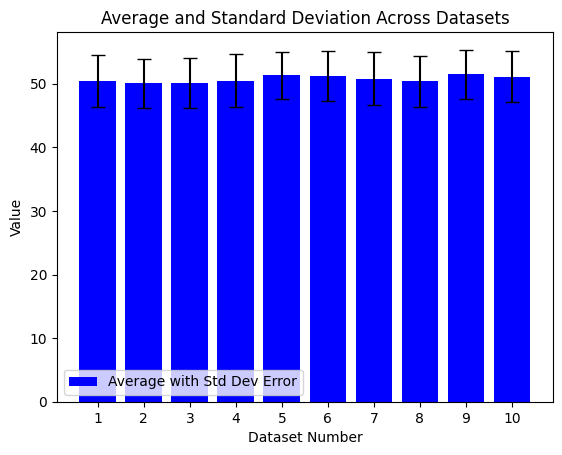

In [134]:
# Creating a bar plot for averages with standard deviation as error bars
plt.bar(dataset_numbers, averages, yerr=std_devs, capsize=5, color='blue', label='Average with Std Dev Error')

# Adding labels and title
plt.xlabel('Dataset Number')
plt.ylabel('Value')
plt.title('Average and Standard Deviation Across Datasets')

# Setting x-axis ticks to show individual dataset numbers
plt.xticks(dataset_numbers)
plt.legend()
plt.show()


### Task 3 - 4 points

A common practice in machine learning is to preprocess data or features by whitening the data (or normalizing it) so that the mean of the data is 0 and the variance (and therefore also standard deviation) is 1. This can be achived with the following transformation

$$\tilde{x}_i = \frac{x_i-\langle x \rangle}{\sigma_{x}}$$

where $x$ is is the original data, $\langle x \rangle$ is the sample mean/average, and $\sigma_{x}$ is the standard deviation. The resultsing transformed data $\tilde{x}$ will then have a mean of 0 and standard deviation of 1.

- A) Create a python function that takes data in the form of a numpy array and returns an numpy array with the whitened/normalized data. Use one of the time series from Task 2 to show that the function does what it should do.
- B) For all 10 time series from Task 2, whiten/normalize that data and make a time series plot and a KDE plot where all 10 time series are shown together.

- Optional for 1 point: For all 10 time series, write out the whiten/normalized data to new text files. The files should have the same format as the original data files with the first column being the time and the second column being the whiten/normalized time series. The data files should include a header as the original files. You should add a suffix to the filenames to somehow indicate that they include whiten/normalized data.

##Creating whiteing or normalising data

##A

In [135]:
def normalised_data(data_array):
  mean = np.mean(data_array)
  std_dev = np.std(data_array)

  # Avoiding division by zero if standard deviation is 0
  if std_dev == 0:
    return np.zeros_like(data_array)

  normalised_array = (data_array - mean) / std_dev
  return normalised_array

print("The normalised_data function has been defined.")

The normalised_data function has been defined.


In [136]:
# Loading one of the time series from Task 2 (e.g., Dataset-01)
filename = 'Task-2_Dataset-01.data'
data = np.loadtxt(filename)
time_series_values = data[:, 1] # Extract the second column (time series values)

# Whiten/normalising the data using the defined function
normalised_time_series = normalised_data(time_series_values)

# Verifying the mean and standard deviation of the whitened data
mean_normalised = np.mean(normalised_time_series)
std_dev_normalised = np.std(normalised_time_series)

print(f"Original Data (Dataset-01) - Mean: {np.mean(time_series_values):.4f}, Std Dev: {np.std(time_series_values):.4f}")
print(f"nornalised Data - Mean: {mean_normalised:.4f}, Std Dev: {std_dev_normalised:.4f}")

Original Data (Dataset-01) - Mean: 50.4477, Std Dev: 4.0870
nornalised Data - Mean: 0.0000, Std Dev: 1.0000


##B

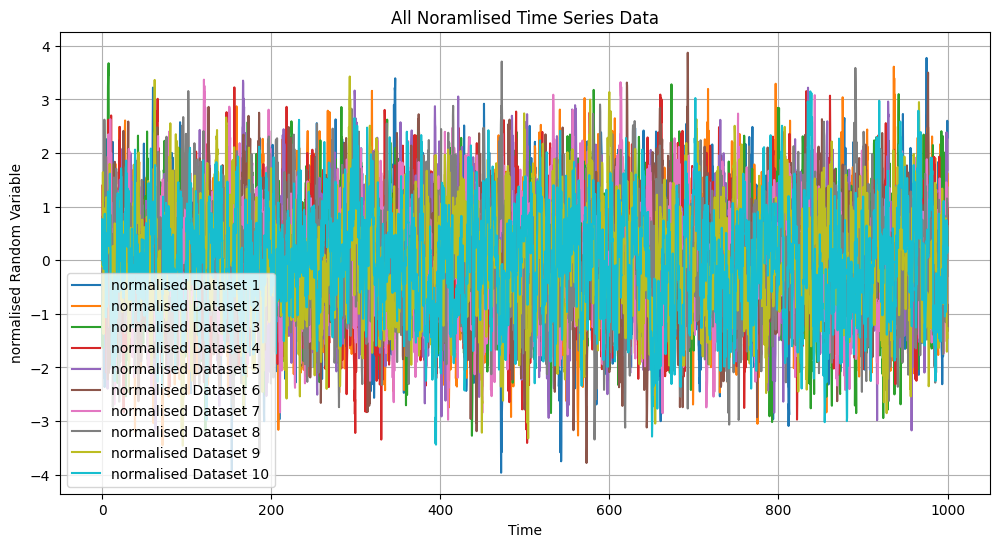

In [137]:
# preparing loop through the 10 dataset files
plt.figure(figsize=(12, 6))
NumberofDataFiles = 10
for i in range(NumberofDataFiles):
  filename = f"Task-2_Dataset-{(i+1):02d}.data"
  data = np.loadtxt(filename)
  time_points = data[:, 0] # Extract the first column (time)
  time_series_values = data[:, 1] # Extract the second column (time series values)

  # Whiten/normalised the time series values
  normalised_series = normalised_data(time_series_values)

  # Plot the whitened time series
  plt.plot(time_points, normalised_series, label=f'normalised Dataset {i+1}')

# Adding labels and title
plt.xlabel("Time")
plt.ylabel("normalised Random Variable")
plt.title("All Noramlised Time Series Data")

plt.legend()

plt.grid(True)
plt.show()


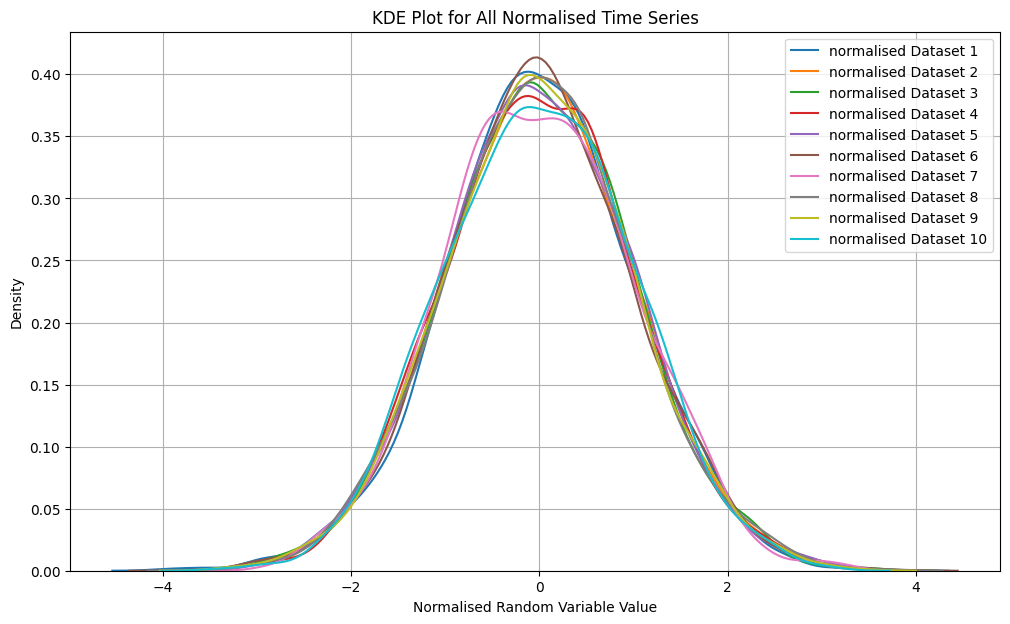

In [138]:
# Setting the optimal bw_adjust value (assuming 1.0)
optimal_bw_adjust = 1.0
plt.figure(figsize=(12, 7))

# preparing loop through the 10 dataset files
NumberofDataFiles = 10
for i in range(NumberofDataFiles):
  filename = f"Task-2_Dataset-{(i+1):02d}.data"
  data = np.loadtxt(filename)
  time_series_values = data[:, 1]

  # Whiten/normalised the time series values
  normalised_series = normalised_data(time_series_values)

  # Plot the Kernel Density Estimate (KDE) of these whitened time series values by using seaborn
  sns.kdeplot(normalised_series, bw_adjust=optimal_bw_adjust, label=f'normalised Dataset {i+1}')

# Adding labels and title
plt.xlabel('Normalised Random Variable Value')
plt.ylabel('Density')
plt.title('KDE Plot for All Normalised Time Series')


plt.legend()
plt.grid(True)
plt.show()


##Optional_saving normalised datas

In [139]:
# Assuming whiten_data function is already defined in the environment
# def whiten_data(data_array):
#   mean = np.mean(data_array)
#   std_dev = np.std(data_array)
#   if std_dev == 0:
#     return np.zeros_like(data_array)
#   whitened_array = (data_array - mean) / std_dev
#   return whitened_array

print("Saving whitened data to new files...")

NumberofDataFiles = 10
for i in range(NumberofDataFiles):
  original_filename = f"Task-2_Dataset-{(i+1):02d}.data"

  # Loading the data
  data = np.loadtxt(original_filename)

  # Extract time points and time series values
  time_points = data[:, 0]
  time_series_values = data[:, 1]

  # Whiten/normalising the time series values
  normalised_series = normalised_data(time_series_values)

  # Combining original time points with whitened/normalised series
  combined_data = np.column_stack((time_points, normalised_series))

  # Creating the new filename
  whitened_filename = original_filename.replace('.data', '_normalised.data')

  # Define header for the new file
  header_string = 'Time\tnormalised_Value'

  # Saving the combined data to the new file
  np.savetxt(whitened_filename, combined_data, fmt='%g', header=header_string, comments='')
  print(f"Saved {whitened_filename}")



Saving whitened data to new files...
Saved Task-2_Dataset-01_normalised.data
Saved Task-2_Dataset-02_normalised.data
Saved Task-2_Dataset-03_normalised.data
Saved Task-2_Dataset-04_normalised.data
Saved Task-2_Dataset-05_normalised.data
Saved Task-2_Dataset-06_normalised.data
Saved Task-2_Dataset-07_normalised.data
Saved Task-2_Dataset-08_normalised.data
Saved Task-2_Dataset-09_normalised.data
Saved Task-2_Dataset-10_normalised.data
